## WORD ANALYSIS

This analysis searches through pubmed for papers that mention specific ERPs. It then scrapes the titles, words, and years of all those papers such that this data can be used for further analysis. 

Here:
- Words analysis: scrapes for ERP papers, pulls out words in abstracts for analysis. 

In [1]:
# Import ERPSC Code for Word Analysis
from erpsc.words import Words
from erpsc.core.io import save_pickle_obj, load_pickle_obj

In [2]:
# Initialize words-analysis object
words = Words()

In [3]:
# Add list of ERPs from file, and list of exclusion words
words.set_erps_file()
words.set_exclusions_file()

In [4]:
# OR: Set small set of ERPs and terms for tests

# Initialize test set of erp terms
erps = [['P100'], ['P300']]
exc = [['protein', 'q21'], ['cancer', 'histone', 'cell']]

# Set ERP terms
words.set_erps(erps)
words.set_exclusions(exc)

Unloading previous ERP words.
Unloading previous exclusion words.


In [5]:
# Scrape word data for all ERP abstracts
words.scrape_data(db='pubmed', retmax='10')

In [6]:
# Combine words from each article together
words.combine_words()

In [7]:
# Compute frequency distributions for words for each ERP
words.freq_dists()

In [8]:
# Check which words are most frequency for each ERP
words.check_words(n_check=10)

P100 :  skin , p , rewarming , effects , water , herp , control , dust , human , study , 
P300 :  processing , auditory , global , experience , patients , study , erp , paradoxes , task , musical , 


In [11]:
# Save pickle of word object
save_pickle_obj(words, 'test2')

In [2]:
# Load word pickle object
words = load_pickle_obj('test2_words')

## WordCloud Plots

In [9]:
import matplotlib.pyplot as plt
from erpsc.plts.wc import conv_freqs, create_wc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
# Create the WordCloud
wc = create_wc(conv_freqs(words.results[1].freqs, 20))

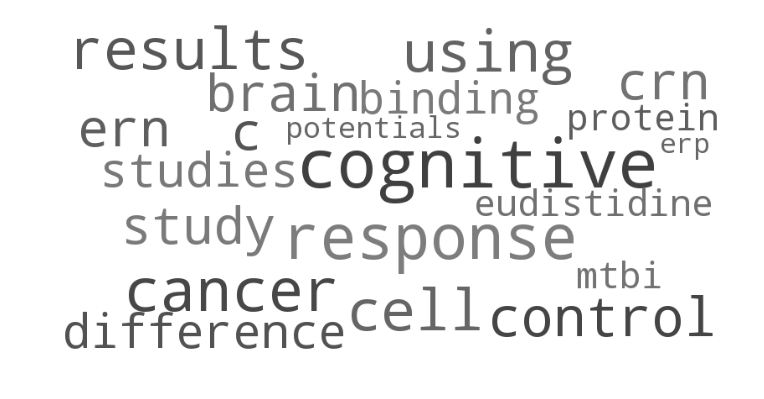

In [14]:
# Display wordcloud
plt.imshow(wc)
plt.axis("off");